In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plots
import missingno as msno

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spe-oil-dataset/Production_Data.csv
/kaggle/input/spe-oil-dataset/Well_Data.csv
/kaggle/input/spe-oil-dataset/Deviation_Survey.csv


In [2]:
wd = pd.read_csv("../input/spe-oil-dataset/Well_Data.csv")
prd = pd.read_csv("../input/spe-oil-dataset/Production_Data.csv")
ds = pd.read_csv("../input/spe-oil-dataset/Deviation_Survey.csv")

In [3]:
prd.shape

(60967, 13)

In [4]:
prd.head()

,Lease,Time (Days),Choke Size,Gas Volume (MMscf),Oil Volume (stb),Water Volume (stb),Gas Lift Inj Volume (MMscf),Casing Pressure (psi(a)),Tubing Pressure (psi(a)),Active Pressure (psi(a)),Line Pressure (psi(a)),Pressure Source,Calculated Sandface Pressure (psi(a))
0,OSPREY,1.0,NaN,0.145,504.39,718.0,NaN,2064.695943,14.695943,2064.695943,14.695943,Casing Pressure,5050.159793
1,OSPREY,2.0,NaN,0.186,564.76,922.0,NaN,1989.695943,14.695943,1989.695943,14.695943,Casing Pressure,5009.599839
2,OSPREY,3.0,NaN,0.231,653.51,753.0,NaN,1864.695943,14.695943,1864.695943,14.695943,Casing Pressure,4795.991972
3,OSPREY,4.0,NaN,0.268,740.71,700.0,NaN,1814.695943,14.695943,1814.695943,14.695943,Casing Pressure,4696.626023
4,OSPREY,5.0,NaN,0.261,678.06,530.0,NaN,1714.695943,14.695943,1714.695943,14.695943,Casing Pressure,4546.990059


In [5]:
prd.isnull().sum()

Lease                                         0
Time (Days)                                   0
Choke Size                                58679
Gas Volume (MMscf)                          219
Oil Volume (stb)                           8430
Water Volume  (stb)                           9
Gas Lift Inj Volume  (MMscf)              53316
Casing Pressure  (psi(a))                     0
Tubing Pressure  (psi(a))                     0
Active Pressure  (psi(a))                     0
Line Pressure  (psi(a))                       0
Pressure Source                               0
Calculated Sandface Pressure  (psi(a))      830
dtype: int64

In [6]:
ds.head()

,Lease,Measured Depth (ft),TVD (ft)
0,OSPREY,0.0,0.0
1,OSPREY,95.1,95.1
2,OSPREY,153.6,153.6
3,OSPREY,214.8,214.8
4,OSPREY,273.1,273.1


In [7]:
wd.head()

,Lease,OSPREY,FALCON,HAWK,EAGLE,KITE,SWIFT,SPARROW,LARK,CARDINAL,...,OWL,FINCH,ROBIN,BLUEBIRD,CANARY,SEAGULL,HUMMINGBIRD,PHOENIX,TOUCAN,GOOSE
0,Well Number,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
1,State,TX,TX,TX,TX,TX,TX,TX,TX,TX,...,PA,PA,PA,PA,PA,PA,PA,PA,PA,PA
2,Formation/Reservoir,EAGLE FORD,EAGLE FORD,EAGLE FORD,EAGLE FORD,EAGLE FORD,EAGLE FORD,EAGLE FORD,EAGLE FORD,EAGLE FORD,...,MARCELLUS - UPPER,MARCELLUS - UPPER,MARCELLUS - UPPER,MARCELLUS - UPPER,MARCELLUS - UPPER,MARCELLUS - UPPER,MARCELLUS - UPPER,MARCELLUS - UPPER,MARCELLUS - UPPER,MARCELLUS - UPPER
3,Initial Pressure Estimate (psi),5400,5700,5650,5000,5000,5164,5164,5700,5900,...,2200,4300,4100,4200,4300,4400,4000,4450,3900,5200
4,Reservoir Temperature (deg F),225,225,225,235,238,225,225,228,228,...,136,133,133,125,133,136,136,137,137,134


In [8]:
wd2 = wd.copy()
wd2.head()

,Lease,OSPREY,FALCON,HAWK,EAGLE,KITE,SWIFT,SPARROW,LARK,CARDINAL,...,OWL,FINCH,ROBIN,BLUEBIRD,CANARY,SEAGULL,HUMMINGBIRD,PHOENIX,TOUCAN,GOOSE
0,Well Number,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
1,State,TX,TX,TX,TX,TX,TX,TX,TX,TX,...,PA,PA,PA,PA,PA,PA,PA,PA,PA,PA
2,Formation/Reservoir,EAGLE FORD,EAGLE FORD,EAGLE FORD,EAGLE FORD,EAGLE FORD,EAGLE FORD,EAGLE FORD,EAGLE FORD,EAGLE FORD,...,MARCELLUS - UPPER,MARCELLUS - UPPER,MARCELLUS - UPPER,MARCELLUS - UPPER,MARCELLUS - UPPER,MARCELLUS - UPPER,MARCELLUS - UPPER,MARCELLUS - UPPER,MARCELLUS - UPPER,MARCELLUS - UPPER
3,Initial Pressure Estimate (psi),5400,5700,5650,5000,5000,5164,5164,5700,5900,...,2200,4300,4100,4200,4300,4400,4000,4450,3900,5200
4,Reservoir Temperature (deg F),225,225,225,235,238,225,225,228,228,...,136,133,133,125,133,136,136,137,137,134


In [9]:
wd2_transposed = wd2.transpose()

In [10]:
wd2_transposed.head()

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,93
Lease,Well Number,State,Formation/Reservoir,Initial Pressure Estimate (psi),Reservoir Temperature (deg F),Net Pay (ft),Wellbore Diameter (ft),Porosity,Water Saturation,Oil Saturation,...,Pressure Loss Correlation,Tubing ID (in),Tubing OD (in),Tubing Depth (ft),Casing ID 1 (in),Casing Footage 1 (ft),Casing ID 2 (in),Casing Footage 2 (ft),Casing Depth (ft),Description
OSPREY,1,TX,EAGLE FORD,5400,225,78,0.7,6.30%,26.00%,74.00%,...,Beggs & Brill,2.441,2.875,6764,4.67,6941,2.992,6307,13248,Well began producing and was later recomplete...
FALCON,2,TX,EAGLE FORD,5700,225,66,0.7,6.30%,27.00%,73.00%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Interior well on a 3-well pad that was shut-i...
HAWK,3,TX,EAGLE FORD,5650,225,67,0.7,6.30%,27.10%,72.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Exterior well on a 3-well pad that was shut-i...
EAGLE,4,TX,EAGLE FORD,5000,235,74,0.7,6.30%,27.00%,73.00%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Single unbounded well with modern completion ...


In [11]:
wd2_transposed.reset_index(inplace=True)
wd2_transposed.head()

,index,0,1,2,3,4,5,6,7,8,...,84,85,86,87,88,89,90,91,92,93
0,Lease,Well Number,State,Formation/Reservoir,Initial Pressure Estimate (psi),Reservoir Temperature (deg F),Net Pay (ft),Wellbore Diameter (ft),Porosity,Water Saturation,...,Pressure Loss Correlation,Tubing ID (in),Tubing OD (in),Tubing Depth (ft),Casing ID 1 (in),Casing Footage 1 (ft),Casing ID 2 (in),Casing Footage 2 (ft),Casing Depth (ft),Description
1,OSPREY,1,TX,EAGLE FORD,5400,225,78,0.7,6.30%,26.00%,...,Beggs & Brill,2.441,2.875,6764,4.67,6941,2.992,6307,13248,Well began producing and was later recomplete...
2,FALCON,2,TX,EAGLE FORD,5700,225,66,0.7,6.30%,27.00%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Interior well on a 3-well pad that was shut-i...
3,HAWK,3,TX,EAGLE FORD,5650,225,67,0.7,6.30%,27.10%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Exterior well on a 3-well pad that was shut-i...
4,EAGLE,4,TX,EAGLE FORD,5000,235,74,0.7,6.30%,27.00%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Single unbounded well with modern completion ...


In [12]:
wd2_transposed.rename(columns={'index': 'Lease'}, inplace=True)
wd2.shape

(94, 54)

In [13]:
#Using first row as column names

wd2_transposed.columns = wd2_transposed.iloc[0]
wd2_transposed = wd2_transposed[1:]
wd2_transposed.head()

,Lease,Well Number,State,Formation/Reservoir,Initial Pressure Estimate (psi),Reservoir Temperature (deg F),Net Pay (ft),Wellbore Diameter (ft),Porosity,Water Saturation,...,Pressure Loss Correlation,Tubing ID (in),Tubing OD (in),Tubing Depth (ft),Casing ID 1 (in),Casing Footage 1 (ft),Casing ID 2 (in),Casing Footage 2 (ft),Casing Depth (ft),Description
1,OSPREY,1,TX,EAGLE FORD,5400,225,78,0.7,6.30%,26.00%,...,Beggs & Brill,2.441,2.875,6764,4.67,6941,2.992,6307,13248,Well began producing and was later recomplete...
2,FALCON,2,TX,EAGLE FORD,5700,225,66,0.7,6.30%,27.00%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Interior well on a 3-well pad that was shut-i...
3,HAWK,3,TX,EAGLE FORD,5650,225,67,0.7,6.30%,27.10%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Exterior well on a 3-well pad that was shut-i...
4,EAGLE,4,TX,EAGLE FORD,5000,235,74,0.7,6.30%,27.00%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Single unbounded well with modern completion ...
5,KITE,5,TX,EAGLE FORD,5000,238,56,0.7,5.00%,32.10%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Child well with modern completion design offs...


In [14]:
#Dealing with empty columns

In [15]:
#Deleting

del wd2_transposed['Condensate Yield (Bc/MMcf)']
del wd2_transposed['Pre-Refrac Completion # Stages']
del wd2_transposed['Pre-Refrac Completion # Clusters ']
del wd2_transposed['Initian Completion # Clusters per Stage']
del prd['Choke Size']

In [16]:
#Filling

prd['Gas Lift Inj Volume  (MMscf)'] = prd['Gas Lift Inj Volume  (MMscf)'].fillna(0)
prd['Gas Volume (MMscf)'] = prd['Gas Volume (MMscf)'].fillna(0)
prd['Oil Volume (stb)'] = prd['Oil Volume (stb)'].fillna(0)


In [17]:
tempp = pd.merge(wd2_transposed, prd, on='Lease')
tempp.head()

,Lease,Well Number,State,Formation/Reservoir,Initial Pressure Estimate (psi),Reservoir Temperature (deg F),Net Pay (ft),Wellbore Diameter (ft),Porosity,Water Saturation,...,Gas Volume (MMscf),Oil Volume (stb),Water Volume (stb),Gas Lift Inj Volume (MMscf),Casing Pressure (psi(a)),Tubing Pressure (psi(a)),Active Pressure (psi(a)),Line Pressure (psi(a)),Pressure Source,Calculated Sandface Pressure (psi(a))
0,OSPREY,1,TX,EAGLE FORD,5400,225,78,0.7,6.30%,26.00%,...,0.145,504.39,718.0,0.0,2064.695943,14.695943,2064.695943,14.695943,Casing Pressure,5050.159793
1,OSPREY,1,TX,EAGLE FORD,5400,225,78,0.7,6.30%,26.00%,...,0.186,564.76,922.0,0.0,1989.695943,14.695943,1989.695943,14.695943,Casing Pressure,5009.599839
2,OSPREY,1,TX,EAGLE FORD,5400,225,78,0.7,6.30%,26.00%,...,0.231,653.51,753.0,0.0,1864.695943,14.695943,1864.695943,14.695943,Casing Pressure,4795.991972
3,OSPREY,1,TX,EAGLE FORD,5400,225,78,0.7,6.30%,26.00%,...,0.268,740.71,700.0,0.0,1814.695943,14.695943,1814.695943,14.695943,Casing Pressure,4696.626023
4,OSPREY,1,TX,EAGLE FORD,5400,225,78,0.7,6.30%,26.00%,...,0.261,678.06,530.0,0.0,1714.695943,14.695943,1714.695943,14.695943,Casing Pressure,4546.990059


In [18]:
#Plots variation of Measured Depth and TVD for each well
# for well_name in ds['Lease'].unique():
#     well_data = ds[ds['Lease'] == well_name]
    
#     plt.figure(figsize=(3, 2))
    
#     # Plot TVD vs Measured Depth for the current well
#     plt.plot(well_data['Measured Depth (ft)'], well_data['TVD (ft)'])
    
#     # Add labels and title for the current subplot
#     plt.xlabel('Measured Depth (units)')
#     plt.ylabel('TVD (units)')
#     plt.title(f'TVD vs Measured Depth - {well_name}')
    
# plt.show()

In [19]:
# Print the column names
# column_names = tempp.columns

# print("Column Names:")
# for name in column_names:
#     print(name)

In [20]:
tempp.isnull().sum()

Lease                                       0
Well Number                                 0
State                                       0
Formation/Reservoir                         0
 Initial Pressure Estimate (psi)            0
                                         ... 
Tubing Pressure  (psi(a))                   0
Active Pressure  (psi(a))                   0
Line Pressure  (psi(a))                     0
Pressure Source                             0
Calculated Sandface Pressure  (psi(a))    830
Length: 102, dtype: int64

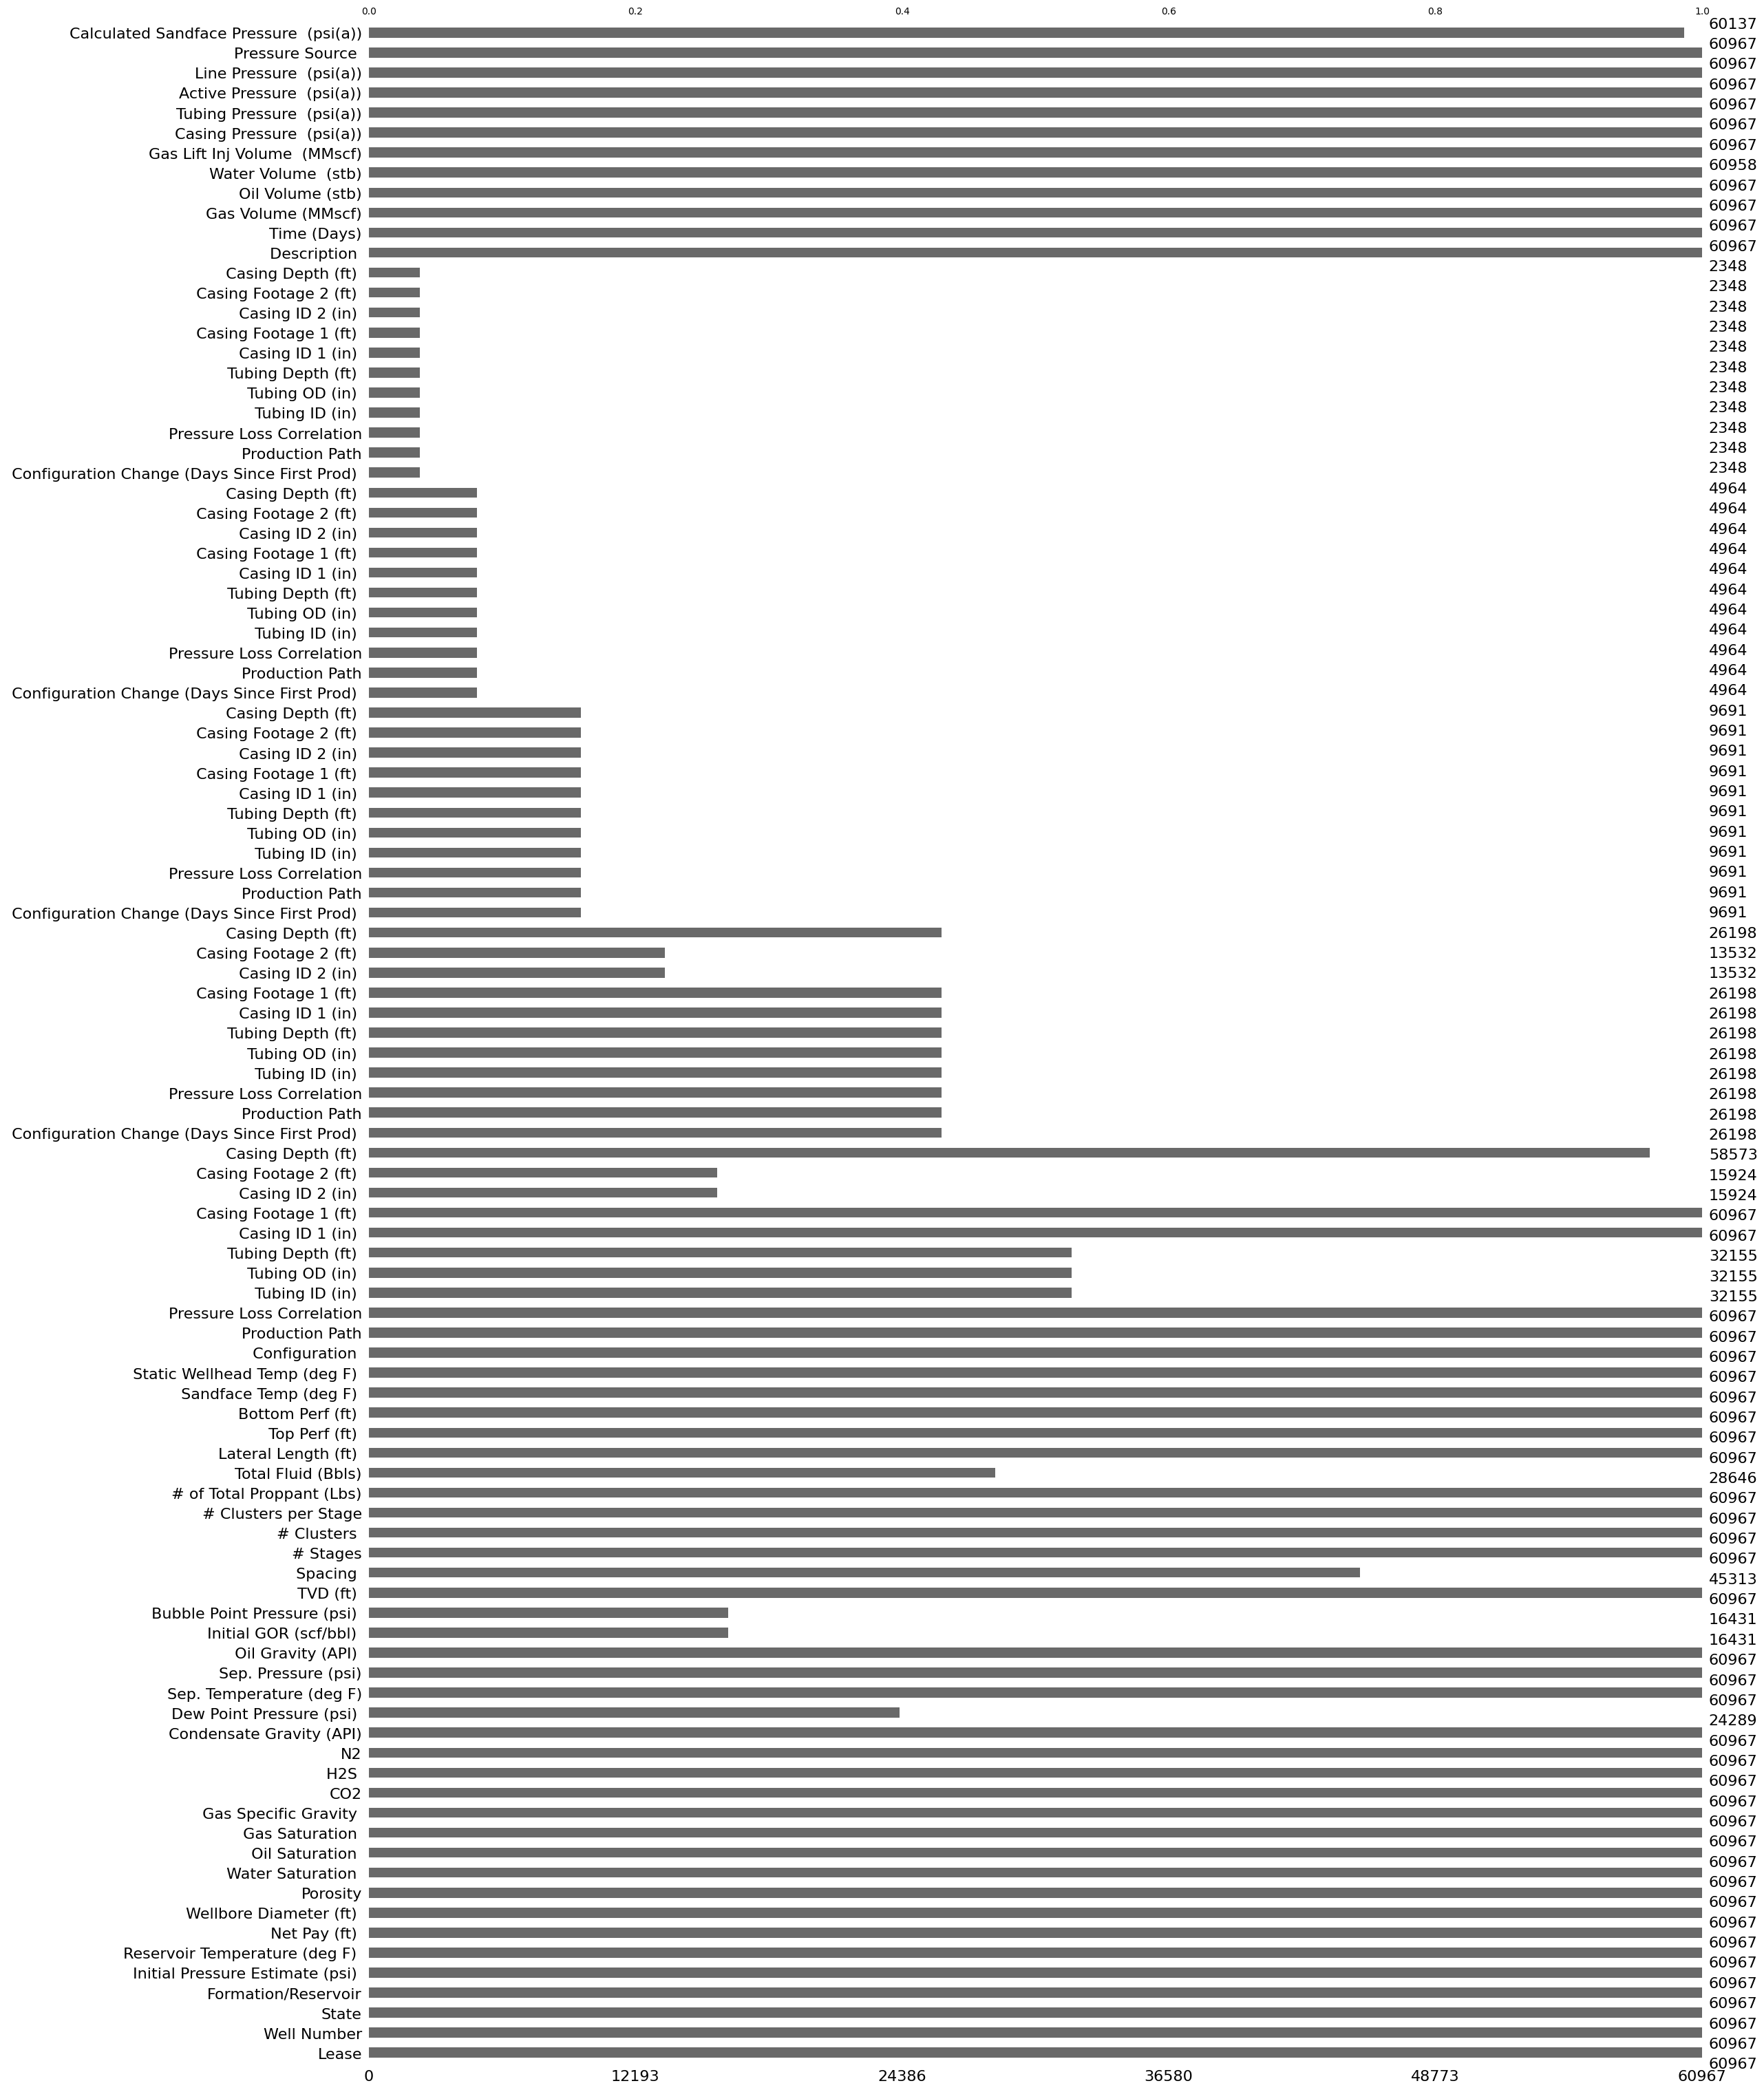

In [21]:
msno.bar(tempp)
plt.show()

In [22]:
tempp['Lease'].unique()

array(['OSPREY', 'FALCON', 'HAWK', 'EAGLE', 'KITE', 'SWIFT', 'SPARROW',
       'LARK', 'CARDINAL', 'JAY', 'CROW', 'LORIKEET', 'MYNAH',
       'PARTRIDGE', 'CASSOWARY', 'ORIOLE', 'WARBLER', 'HARPY',
       'BEE-EATER', 'LOON', 'CUCKOO', 'ROOSTER', 'ARCHAEOPTERYX', 'TERN',
       'STILT', 'AVOCET', 'OSTRICH', 'EMU', 'DUCK', 'HERON', 'STORK',
       'SWAN', 'PARROT', 'CRANE', 'IBIS', 'EGRET', 'PHEASANT', 'MACAW',
       'FLAMINGO', 'PEACOCK', 'PENGUIN', 'ALBATROSS', 'PELICAN', 'OWL',
       'FINCH', 'ROBIN', 'BLUEBIRD', 'CANARY', 'SEAGULL', 'HUMMINGBIRD',
       'PHOENIX', 'TOUCAN', 'GOOSE'], dtype=object)

In [23]:
prd.to_excel('output_file.xlsx', index=False)
wd2_transposed.to_excel('outputwd_file.xlsx', index=False)